In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from models.model1 import create_model1
from models.model2 import create_model2
from models.model3 import create_model3
from models.model4 import create_model4
import tensorflow as tf
import dotenv
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
dotenv.load_dotenv()
home_path = os.getenv("HOME_PATH")

In [4]:
resources_path = "/DeepLearningGridSolver/Sudoku.DeepLearning/Resources/"
data = pd.read_csv(home_path + resources_path + "sudoku.csv")
data.head()

,puzzle,solution
0,0700000430400096108006349000940520003584600200...,6795182435437296188216349577943521863584617292...
1,3010865040465210705000000014008000020803479000...,3719865248465213795924738614638197522853479167...
2,0483015603600080909106700030200009355090102006...,7483915623652487919126754834217869355894132766...
3,0083170000042051090000400703271609049014500000...,2983176457642851391539462783271689549814537266...
4,0408906300001368208007405190004670524500207002...,1428956379751368248367425193984671524513287962...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000000 entries, 0 to 8999999
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   puzzle    object
 1   solution  object
dtypes: object(2)
memory usage: 137.3+ MB


### Number of blanks in sudokus

In [6]:
number_blanks = []
for i in range(len(data)):
    number_blanks.append(data["puzzle"][i].count("0"))
number_blanks[:10]

[44, 42, 40, 42, 39, 44, 32, 45, 43, 49]

In [7]:
data["number_blanks"] = number_blanks
data.tail()

,puzzle,solution,number_blanks
8999995,2048090300004200800806300000910006083009041207...,2648197351374259865896372414913726583569841277...,41
8999996,8001003000005900045296401704000000212080190506...,8641723951735982645296431784578369212384196576...,42
8999997,0000003000008054604900630810070800301000592088...,2687143953718954624952637816571829341346592788...,48
8999998,0290061007030000608617020054300009010000100400...,5298461377431598628617324954376289512859137469...,46
8999999,0040109000000003151025890000000902068007600099...,5743169286892473151325897644178932568537621499...,42


In [8]:
value_counts = data["number_blanks"].value_counts()
value_counts

number_blanks
45    650810
44    642208
46    635339
43    614257
47    591077
42    573332
41    523576
48    517507
40    470816
49    424195
39    415920
38    364182
37    315259
50    314756
36    269619
35    228562
51    208498
34    193094
33    160784
32    133085
52    118817
31    110194
30     90280
29     73584
28     59119
53     56760
27     47977
26     37918
25     29746
24     23417
54     21546
23     18327
22     14376
21     11128
20      8405
19      6558
55      6304
18      4825
17      3584
16      2619
15      1922
14      1390
56      1297
13      1044
12       642
11       456
10       282
9        188
57       182
8        103
7         72
6         25
58        18
5         11
4          8
Name: count, dtype: int64

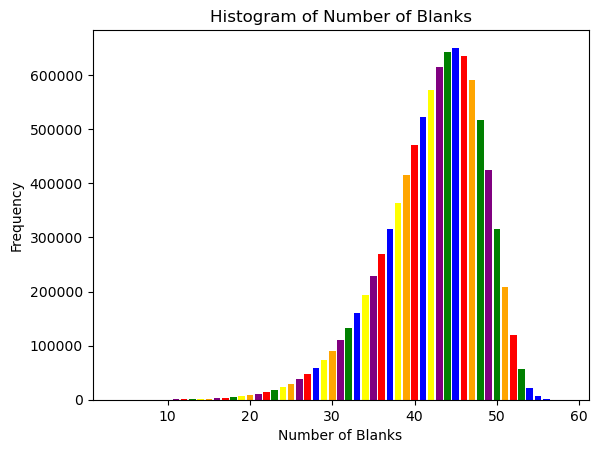

In [9]:
plt.bar(value_counts.index, value_counts.values, color=['blue', 'green', 'red', 'purple', 'orange', 'yellow'])

plt.xlabel('Number of Blanks')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Blanks')

plt.show()

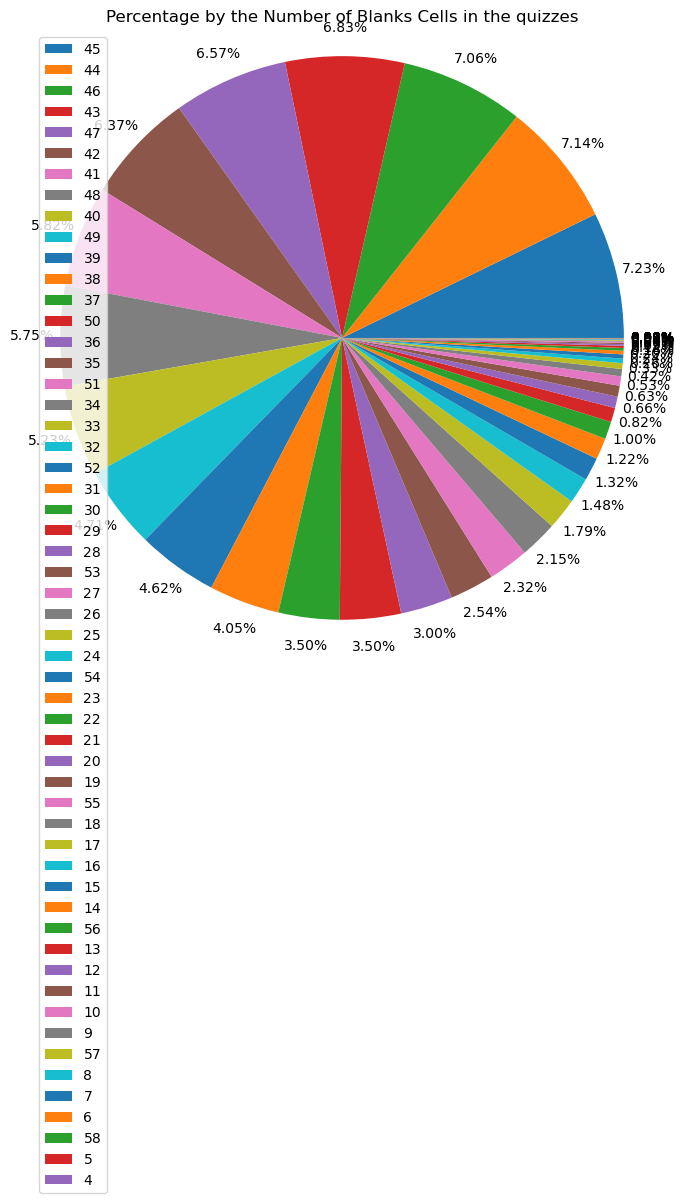

In [10]:
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(data['number_blanks'].value_counts(), autopct='%1.2f%%', pctdistance=1.1)
ax1.legend(data['number_blanks'].value_counts().index)
ax1.axis('equal')

plt.title("Percentage by the Number of Blanks Cells in the quizzes")
plt.show()

### Print an example

In [ ]:
print("Quiz:\n",np.array(list(map(int,list(data['puzzle'][0])))).reshape(9,9))
print("Solution:\n",np.array(list(map(int,list(data['solution'][0])))).reshape(9,9))

In [ ]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, df, batch_size=64, subset="train", shuffle=False, info={}):
        super().__init__()
        self.df = df
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.subset = subset
        self.info = info
        
        self.data_path = resources_path
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.ceil(len(self.df) / self.batch_size))  # Use np.ceil to include the remaining samples in the last batch
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.df))
        if self.shuffle:
            np.random.shuffle(self.indexes)
            
    def __getitem__(self, index):
        X = np.empty((self.batch_size, 9, 9, 1))
        y = np.empty((self.batch_size, 81, 1))
        indexes = self.indexes[index * self.batch_size: (index + 1) * self.batch_size]
        for i, f in enumerate(self.df['puzzle'].iloc[indexes]):
            self.info[index * self.batch_size + i] = f
            X[i,] = (np.array(list(map(int, list(f)))).reshape((9, 9, 1)) / 9) - 0.5
        if self.subset == 'train':
            for i, f in enumerate(self.df['solution'].iloc[indexes]):
                self.info[index * self.batch_size + i] = f
                y[i,] = np.array(list(map(int, list(f)))).reshape((81, 1)) - 1
        if self.subset == 'train':
            return X, y
        else:
            return X

In [ ]:
# model = create_model1()
# model = create_model2()
# model = create_model3()
# model = create_model4()

model = tf.keras.models.load_model('/home/assil/DeepLearningGridSolver/Sudoku.DeepLearning/Resources/training_notebook/cnn4.h5')

In [ ]:
model.summary()

### Data Generators
We will be creating training and test data generator. Lets use 95% data for training and 5% data for validation as 5% of 9Million is still very large for validation purposes. 

In [ ]:
train_idx = int(len(data)*0.95)
data = data.sample(frac=1).reset_index(drop=True)
training_generator = DataGenerator(data.iloc[:train_idx], subset = "train", batch_size=64)
validation_generator = DataGenerator(data.iloc[train_idx:], subset = "train",  batch_size=64)

In [ ]:
training_generator.__getitem__(4)[0].shape

### Callbacks

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=2,
    verbose=1,
    min_lr=1e-8
)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
history = model.fit(training_generator, validation_data = validation_generator, batch_size = 64, epochs = 100, verbose=1, callbacks=[reduce_lr])

In [ ]:
# save model and architecture to single file
model.save("cnn4-1.keras")

## <span style="color:teal;text-decoration:underline">Solving Real Sudokus</span>

In [ ]:
def solve_sudoku_with_nn(model, puzzle):
    # Preprocess the input Sudoku puzzle
    puzzle = puzzle.replace('\n', '').replace(' ', '')
    initial_board = np.array([int(j) for j in puzzle]).reshape((9, 9, 1))
    initial_board = (initial_board / 9) - 0.5

    while True:
        # Use the neural network to predict values for empty cells
        predictions = model.predict(initial_board.reshape((1, 9, 9, 1))).squeeze()
        pred = np.argmax(predictions, axis=1).reshape((9, 9)) + 1
        prob = np.around(np.max(predictions, axis=1).reshape((9, 9)), 2)

        initial_board = ((initial_board + 0.5) * 9).reshape((9, 9))
        mask = (initial_board == 0)

        if mask.sum() == 0:
            # Puzzle is solved
            break

        prob_new = prob * mask

        ind = np.argmax(prob_new)
        x, y = (ind // 9), (ind % 9)

        val = pred[x][y]
        initial_board[x][y] = val
        initial_board = (initial_board / 9) - 0.5

    # Convert the solved puzzle back to a string representation
    solved_puzzle = ''.join(map(str, initial_board.flatten().astype(int)))

    return solved_puzzle

You can put in any game in the "game" string to solve it. Just copy new_game string in the game string and modify the desired zeros.

In [ ]:
def print_sudoku_grid(puzzle):
    puzzle = puzzle.replace('\n', '').replace(' ', '')
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("-"*21)

        for j in range(9):
            if j % 3 == 0 and j != 0:
                print("|", end=" ")
            print(puzzle[i*9 + j], end=" ")
        print()
new_game = '''
          0 0 0 0 0 0 0 0 0
          0 0 0 0 0 0 0 0 0
          0 0 0 0 0 0 0 0 0
          0 0 0 0 0 0 0 0 0
          0 0 0 0 0 0 0 0 0
          0 0 0 0 0 0 0 0 0
          0 0 0 0 0 0 0 0 0
          0 0 0 0 0 0 0 0 0
          0 0 0 0 0 0 0 0 0
      '''

game = '''
          0 0 0 7 0 0 0 9 6
          0 0 3 0 6 9 1 7 8
          0 0 7 2 0 0 5 0 0
          0 7 5 0 0 0 0 0 0
          9 0 1 0 0 0 3 0 0
          0 0 0 0 0 0 0 0 0
          0 0 9 0 0 0 0 0 1
          3 1 8 0 2 0 4 0 7
          2 4 0 0 0 5 0 0 0
      '''

solved_puzzle_nn = solve_sudoku_with_nn(model, game)

# Print the solved puzzle as a grid
print("Sudoku Solution (NN):")
print_sudoku_grid(solved_puzzle_nn)